Tarea III

AdvNNs

7 de noviembre de 2025

Resumen

El objetivo de esta tarea es iniciar el proyecto final. Por favor, suba sus soluciones en un archivo comprimido a Classroom antes del 18 de noviembre.

Problema 1

Describa en los siguientes puntos clave de su proyecto:

a) Un breve resumen del proyecto. No olvide declarar claramente el objetivo de su proyecto.

En un proyecto para una aplicación que le enseñe a los niños identificar diferentes deportes a través de imágenes, se busca desarrollar modelo que dada la enorme cantidad de imágenes que se requieren para, en primer lugar, la aplicación sea entretenida y, en segundo lugar, pueda identificar si un usuario suba una imagen de un deporte específico, el modelo debe ser capaz de clasificar imágenes en diferentes categorías deportivas (fútbol, baloncesto, tenis, natación, etc.) con alta precisión y eficiencia.

b) Descripción del conjunto de datos. Describa la forma, el tamaño y el preprocesamiento existente de sus datos, incluyendo el proceso de recolección de datos, etc. Añada el enlace URL de los datos.

El conjunto de datos **Sports Image Dataset** contiene imágenes clasificadas en 22 categorías deportivas, cada una representada por una carpeta con el nombre del deporte correspondiente. Cada carpeta incluye entre 400 y 900 imágenes, con un total aproximado de 14,300 imágenes. Estas imágenes fueron recolectadas utilizando un scraper de Google Images, lo que asegura una amplia variedad de ejemplos para cada categoría.

El conjunto de datos está organizado de la siguiente manera:
- **Número de categorías**: 22 (por ejemplo, fútbol, baloncesto, natación, etc.)
- **Número de imágenes por categoría**: Entre 400 y 900
- **Tamaño total**: 494.03 MB
- **Formato de las imágenes**: No especificado, pero típicamente en formatos comunes como JPG o PNG
- **Licencia**: CC BY-NC-SA 4.0

El preprocesamiento inicial incluye la clasificación de las imágenes en carpetas según su categoría. Sin embargo, no se menciona ningún otro tipo de preprocesamiento, como el cambio de tamaño, normalización o eliminación de imágenes duplicadas.

**Enlace al conjunto de datos**: [Sports Image Dataset en Kaggle](https://www.kaggle.com/datasets/rishikeshkonapure/sports-image-dataset/data)

c) Arquitectura de su modelo. Describa todos los hiperparámetros pertenecientes a su modelo, como el número de capas, neuronas, tipo de red neuronal, etc. Aunque la arquitectura final pueda variar, explique su elección inicial y calcule el número de parámetros entrenables.

Elegire como arquitectura inicial una red neuronal convolucional (CNN) debido a su eficacia comprobada en tareas de clasificación de imágenes. La arquitectura propuesta es la siguiente:

Sera una arquitectura ResNet18, lo considero adecuado debido a su capacidad para aprender características jerárquicas y su eficacia en la clasificación de imágenes.

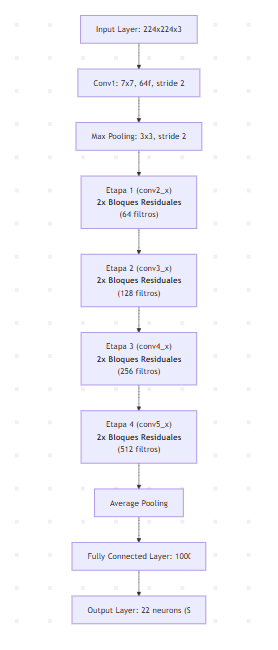

d) Describa otras consideraciones, incluyendo optimizador, función de coste, etc. Describa por qué los eligió entre otras posibilidades.

In [ ]:
# Celda de código para desarrollo

Problema 2

Realice un análisis exploratorio de datos. Anote todas sus conclusiones.

In [1]:
import os
import kagglehub
import glob

path = kagglehub.dataset_download("rishikeshkonapure/sports-image-dataset")

# Cambia 'images' por 'data' para buscar en todas las carpetas de deportes
imagenes_dir = os.path.join(path, "data")

# Buscar todas las imágenes jpg en todos los subdirectorios
imagenes = glob.glob(os.path.join(imagenes_dir, "**", "*.jpg"), recursive=True)

print(f"Total de imágenes encontradas: {len(imagenes)}")

Total de imágenes encontradas: 12991


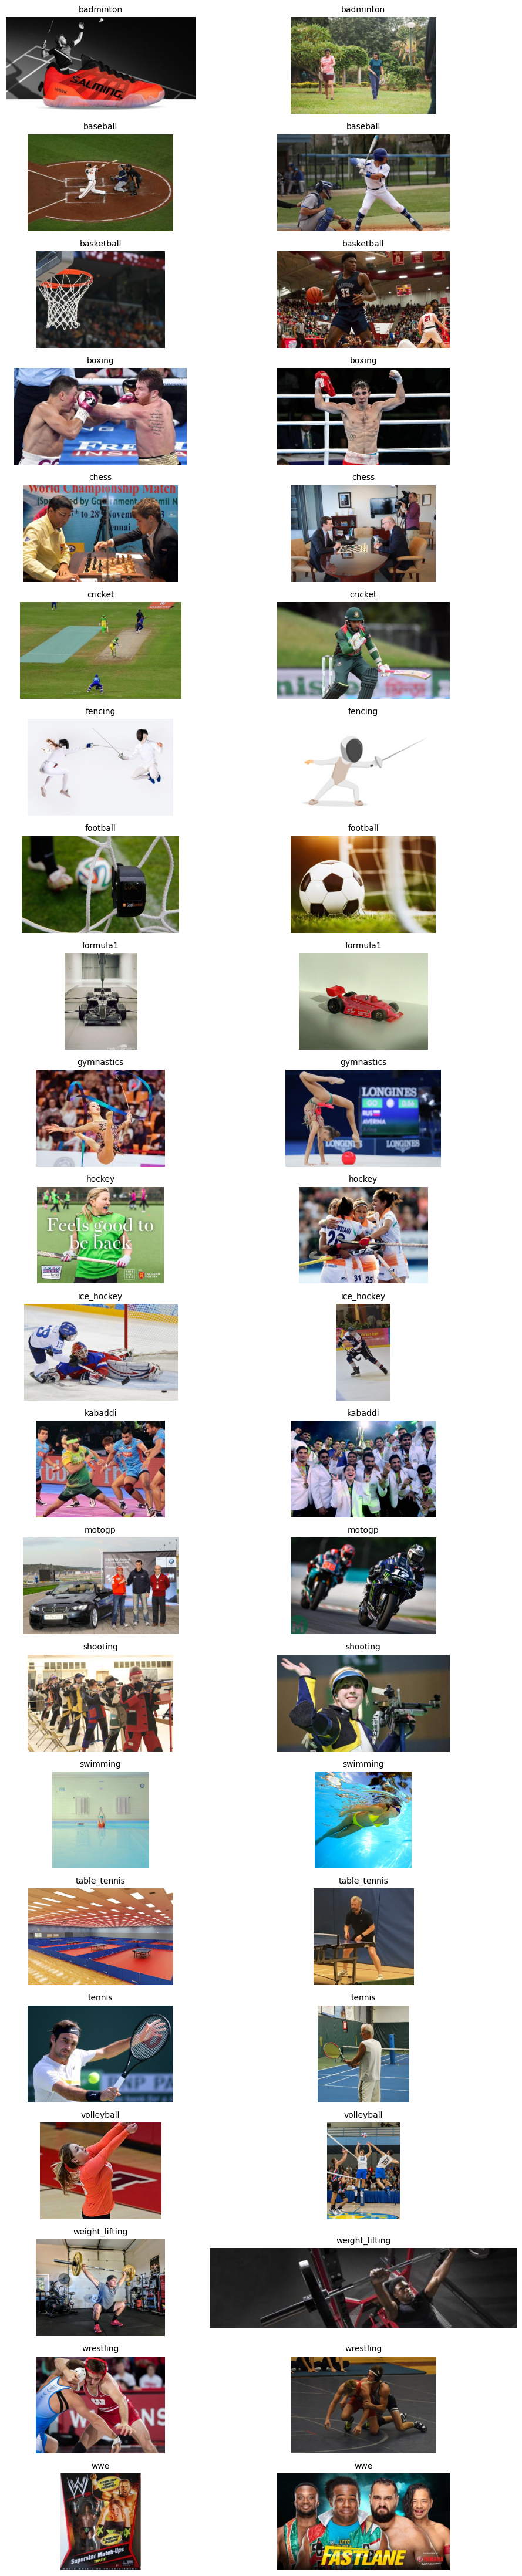

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import random

imagenes_por_carpeta = {}
for img_path in imagenes:
    carpeta = os.path.basename(os.path.dirname(img_path))
    imagenes_por_carpeta.setdefault(carpeta, []).append(img_path)


imagenes_seleccionadas = []
carpetas = list(imagenes_por_carpeta.keys())
for carpeta in carpetas:
    imgs = imagenes_por_carpeta[carpeta]
    seleccionadas = random.sample(imgs, min(2, len(imgs)))
    for img in seleccionadas:
        imagenes_seleccionadas.append((img, carpeta))

# Muestra las imágenes
plt.figure(figsize=(10, 2 * len(imagenes_seleccionadas) // 2))
for i, (img_path, carpeta) in enumerate(imagenes_seleccionadas):
    img = mpimg.imread(img_path)
    plt.subplot(len(imagenes_seleccionadas) // 2, 2, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(carpeta, fontsize=10)
plt.tight_layout()
plt.show()

La anterior salida de codigo muestra un par de imagenes por categoria deportiva, permitiendo observar la variedad y características visuales de las imágenes en cada categoría.

In [3]:
def brillo_medio_color(img_path: str) -> float:
    """
    Calcula el brillo promedio de una imagen RGB.
    El brillo se define como el promedio de los valores de los canales R, G y B.

    Parámetros:
    img_path (str): Ruta de la imagen.

    Retorna:
    float: Brillo promedio.
    """
    try:
        img = mpimg.imread(img_path)
        if img.ndim == 3 and img.shape[2] >= 3:
            # Si la imagen está en formato uint8, normaliza a [0,255]
            if img.dtype == np.uint8:
                brillo = np.mean(img[..., :3])
            else:
                brillo = np.mean(img[..., :3] * 255)
            return brillo
        else:
            # Imagen en escala de grises
            return np.mean(img)
    except Exception as e:
        print(f"Error al procesar {img_path}: {e}")
        return np.nan

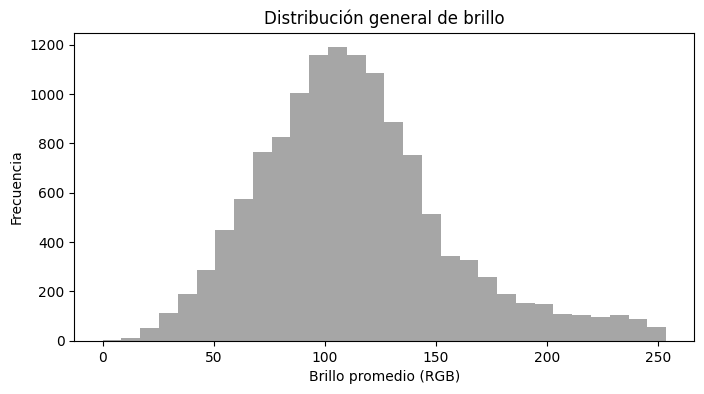

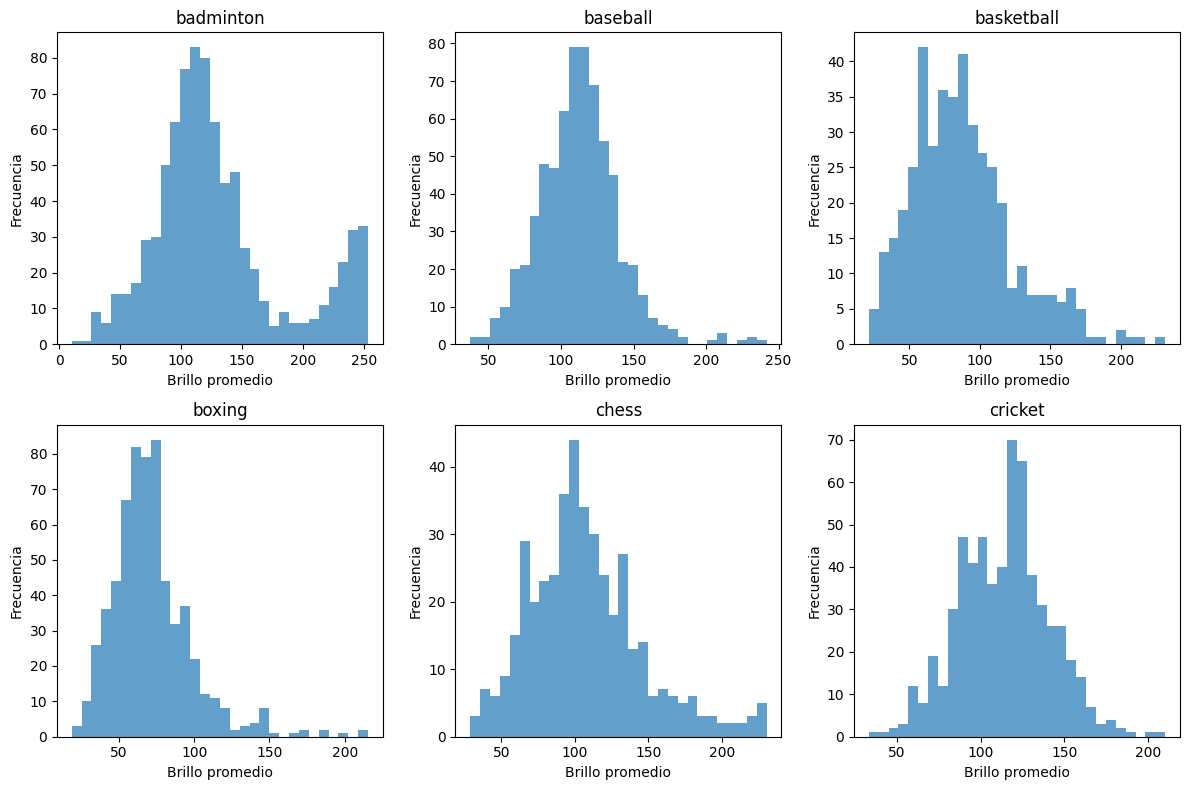

In [4]:
# Visualiza la distribución de brillo por carpeta y en general
import matplotlib.pyplot as plt

# Calcula brillos por carpeta
brillos_por_carpeta = {}
for carpeta, rutas in imagenes_por_carpeta.items():
    brillos = [brillo_medio_color(p) for p in rutas if os.path.exists(p)]
    brillos = [b for b in brillos if not np.isnan(b)]
    if brillos:
        brillos_por_carpeta[carpeta] = brillos

# Histograma general
todos_los_brillos = [b for brillos in brillos_por_carpeta.values() for b in brillos]
plt.figure(figsize=(8,4))
plt.hist(todos_los_brillos, bins=30, color='gray', alpha=0.7)
plt.title('Distribución general de brillo')
plt.xlabel('Brillo promedio (RGB)')
plt.ylabel('Frecuencia')
plt.show()

# Histogramas por carpeta (máx 6 carpetas para visualización)
plt.figure(figsize=(12,8))
for i, (carpeta, brillos) in enumerate(list(brillos_por_carpeta.items())[:6]):
    plt.subplot(2,3,i+1)
    plt.hist(brillos, bins=30, alpha=0.7)
    plt.title(f'{carpeta}')
    plt.xlabel('Brillo promedio')
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

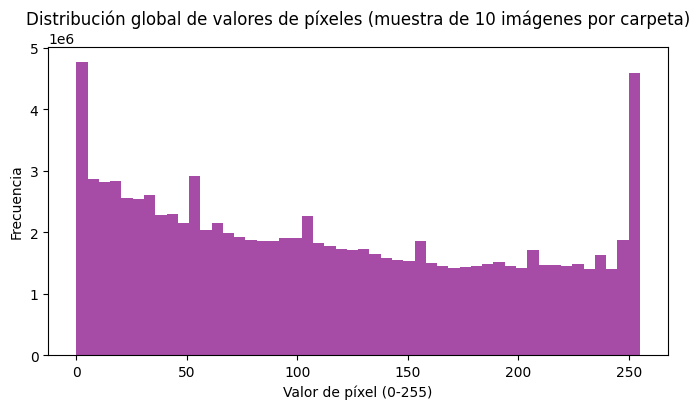

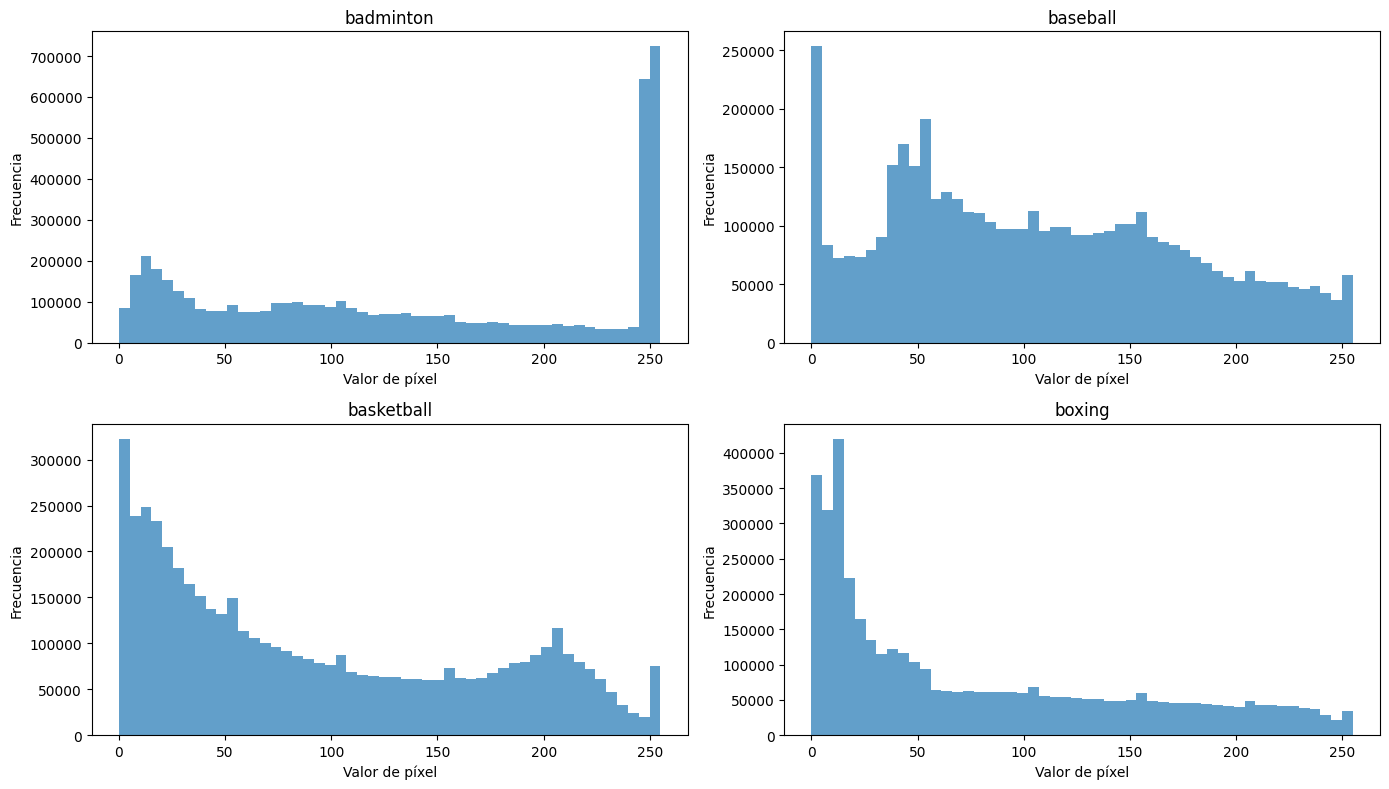

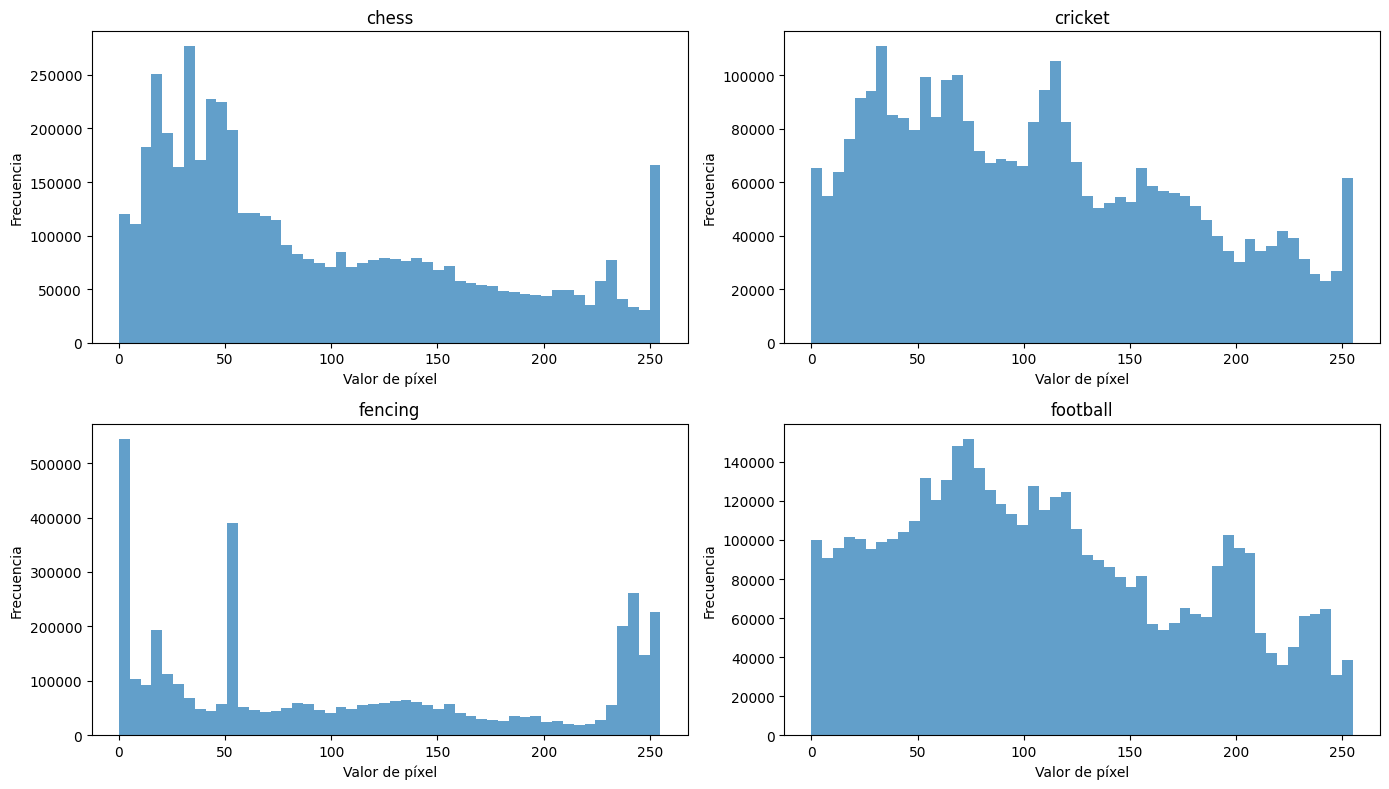

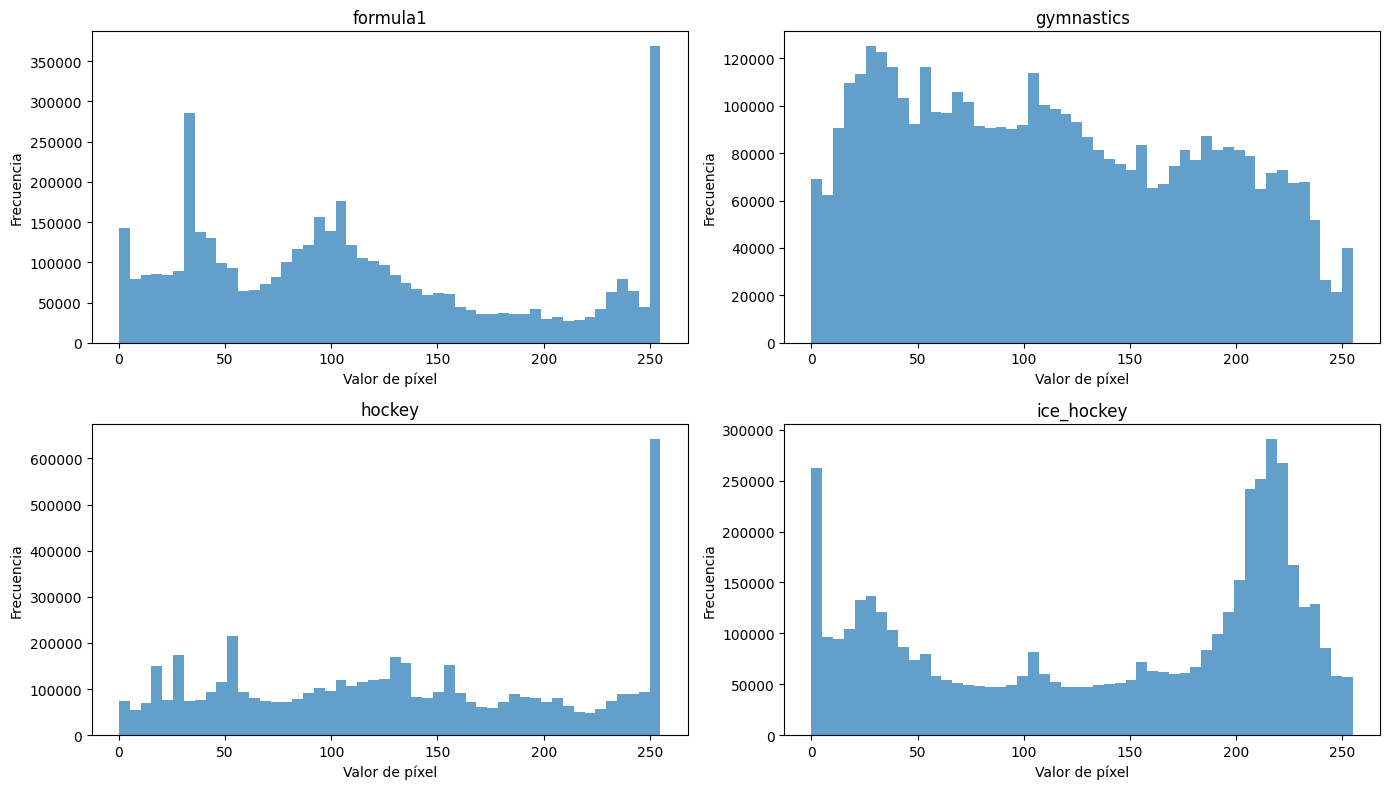

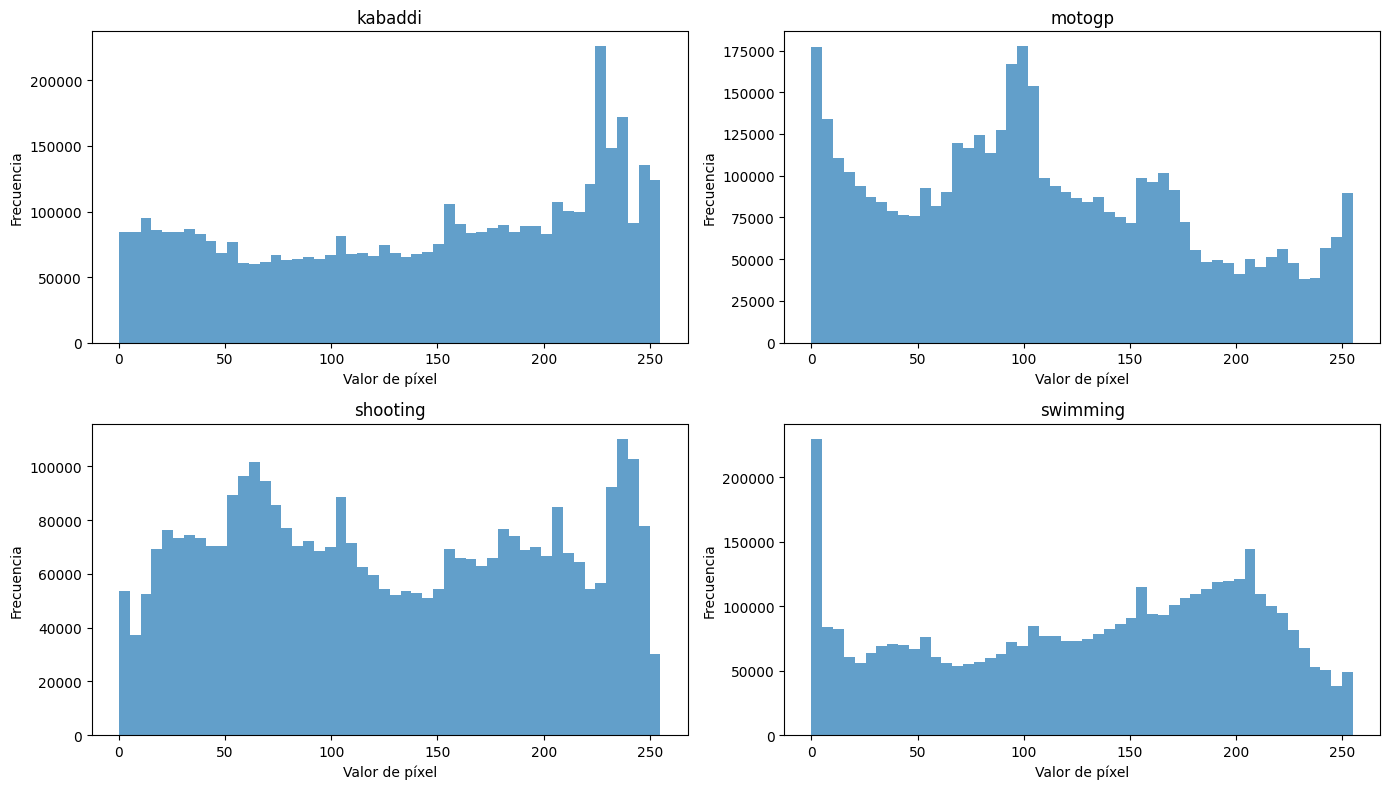

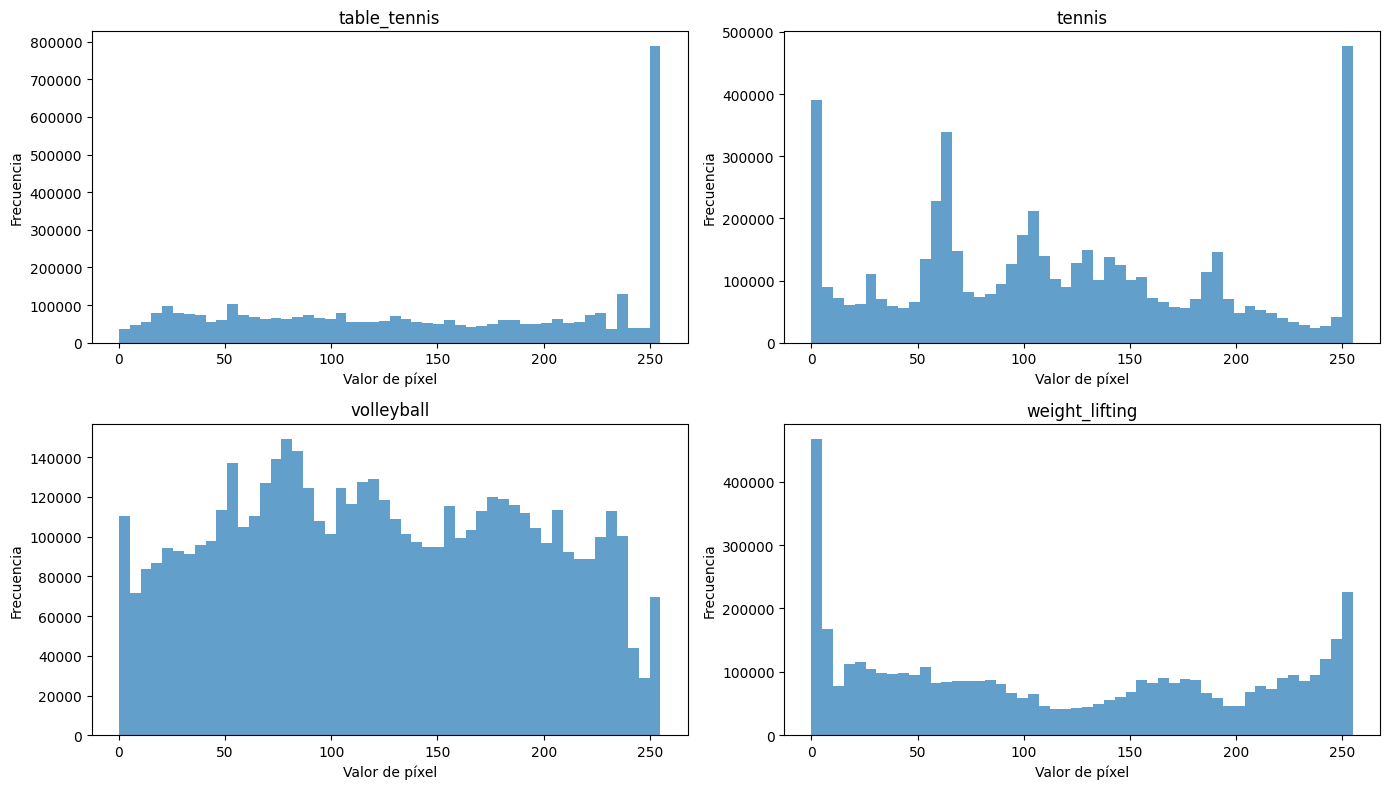

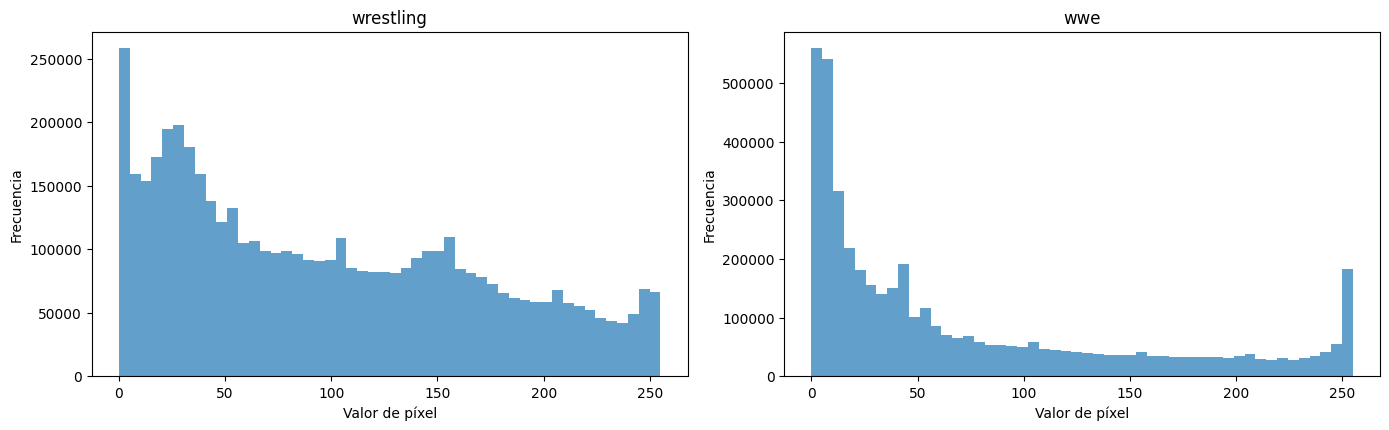

In [5]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

# Selecciona hasta 10 imágenes por cada carpeta (todas las carpetas incluidas)
pixeles_por_carpeta = {}
for carpeta, rutas in imagenes_por_carpeta.items():
    seleccionadas = random.sample(rutas, min(10, len(rutas)))
    pixeles = []
    for img_path in seleccionadas:
        if os.path.exists(img_path):
            try:
                img = mpimg.imread(img_path)
                if img.ndim == 3 and img.shape[2] >= 3:
                    arr = img[..., :3].reshape(-1)
                    if img.dtype != np.uint8:
                        arr = (arr * 255)
                    arr = arr.astype(np.uint8)
                else:
                    arr = img.reshape(-1)
                    arr = arr.astype(np.uint8)
                pixeles.extend(arr.tolist())
            except Exception as e:
                pass
    if pixeles:
        pixeles_por_carpeta[carpeta] = pixeles

# Histograma global
todos_pixeles = [p for pixs in pixeles_por_carpeta.values() for p in pixs]
plt.figure(figsize=(8,4))
plt.hist(todos_pixeles, bins=50, color='purple', alpha=0.7)
plt.title('Distribución global de valores de píxeles (muestra de 10 imágenes por carpeta)')
plt.xlabel('Valor de píxel (0-255)')
plt.ylabel('Frecuencia')
plt.show()

# Visualización: 4 histogramas por figura para mejor claridad
carpetas_a_mostrar = list(pixeles_por_carpeta.items())
num_por_figura = 4
num_figuras = (len(carpetas_a_mostrar) + num_por_figura - 1) // num_por_figura

for fig_idx in range(num_figuras):
    plt.figure(figsize=(14, 8))
    for i in range(num_por_figura):
        idx = fig_idx * num_por_figura + i
        if idx >= len(carpetas_a_mostrar):
            break
        carpeta, pixs = carpetas_a_mostrar[idx]
        plt.subplot(2, 2, i + 1)
        plt.hist(pixs, bins=50, alpha=0.7)
        plt.title(f'{carpeta}')
        plt.xlabel('Valor de píxel')
        plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

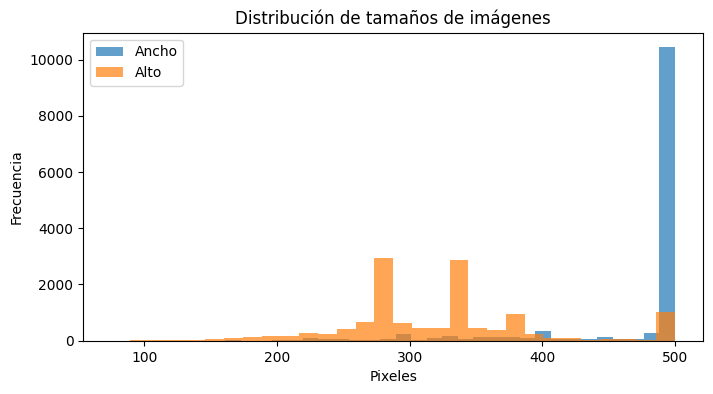

Tamaño más común: (500, 281)
Tamaños únicos: 1648


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from collections import Counter

anchos = []
altos = []

for img_path in imagenes:
    if os.path.exists(img_path):
        try:
            img = mpimg.imread(img_path)
            altos.append(img.shape[0])
            anchos.append(img.shape[1])
        except Exception as e:
            pass

plt.figure(figsize=(8,4))
plt.hist(anchos, bins=30, alpha=0.7, label='Ancho')
plt.hist(altos, bins=30, alpha=0.7, label='Alto')
plt.title('Distribución de tamaños de imágenes')
plt.xlabel('Pixeles')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Corrige el cálculo del tamaño más común
tamanos = list(zip(anchos, altos))
contador = Counter(tamanos)
mas_comun = contador.most_common(1)[0][0] if contador else (None, None)
print(f'Tamaño más común: {mas_comun}')
print(f'Tamaños únicos: {len(contador)}')

La mayoría de imagenes son de (500 x 281) pixeles, hacer un resize de todas las imagenes a (224 x 224) pixeles sera adecuado para el modelo.

In [7]:
'''
from PIL import Image
import glob
import os

# Carpeta de entrada y salida
input_dir = imagenes_dir
output_dir = "data_224"

os.makedirs(output_dir, exist_ok=True)

# Busca todas las imágenes jpg y png
imagenes = glob.glob(os.path.join(input_dir, "**", "*.jpg"), recursive=True) + \
           glob.glob(os.path.join(input_dir, "**", "*.png"), recursive=True)

for img_path in imagenes:
    with Image.open(img_path) as img:
        img_resized = img.resize((224, 224), Image.LANCZOS)
        # Crea la misma estructura de carpetas en la salida
        rel_path = os.path.relpath(img_path, input_dir)
        out_path = os.path.join(output_dir, rel_path)
        os.makedirs(os.path.dirname(out_path), exist_ok=True)
        img_resized.save(out_path)
'''

'\nfrom PIL import Image\nimport glob\nimport os\n\n# Carpeta de entrada y salida\ninput_dir = imagenes_dir\noutput_dir = "data_224"\n\nos.makedirs(output_dir, exist_ok=True)\n\n# Busca todas las imágenes jpg y png\nimagenes = glob.glob(os.path.join(input_dir, "**", "*.jpg"), recursive=True) +            glob.glob(os.path.join(input_dir, "**", "*.png"), recursive=True)\n\nfor img_path in imagenes:\n    with Image.open(img_path) as img:\n        img_resized = img.resize((224, 224), Image.LANCZOS)\n        # Crea la misma estructura de carpetas en la salida\n        rel_path = os.path.relpath(img_path, input_dir)\n        out_path = os.path.join(output_dir, rel_path)\n        os.makedirs(os.path.dirname(out_path), exist_ok=True)\n        img_resized.save(out_path)\n'

Problema 3

Realice una implementación inicial "ingenua" de su proyecto usando PyTorch. Calcule al menos lo siguiente:

a) Gráfica de error a lo largo de las iteraciones.

b) Precisiones finales de entrenamiento/prueba.

c) Tiempo de su simulación (entrenamiento).

d) Muestre un dato donde su modelo entrenado exhiba un desempeño excelente.

e) Muestre un dato donde su modelo entrenado exhiba un desempeño pobre.

f) Identifique el mayor problema/desafío con su modelo actual.

g) Proponga un plan para abordar lo anterior.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import time
import os
from collections import Counter

# Configuración de dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Usando dispositivo: {device}')

# Hiperparámetros
BATCH_SIZE = 32
NUM_EPOCHS = 20
LEARNING_RATE = 1e-4
TRAIN_SPLIT = 0.8

# Transformaciones para las imágenes (con resize incluido)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize mediante PyTorch
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Carga del dataset desde el directorio de Kaggle (imagenes_dir ya definido antes)
print(f'Cargando dataset desde: {imagenes_dir}')

dataset = datasets.ImageFolder(root=imagenes_dir, transform=transform)
print(f'Total de imágenes: {len(dataset)}')
print(f'Clases: {dataset.classes}')
print(f'Número de clases: {len(dataset.classes)}')

# División estratificada en entrenamiento y prueba (balance perfecto por clase)
targets = [label for _, label in dataset.samples]
indices = list(range(len(dataset)))

train_indices, test_indices = train_test_split(
    indices, 
    test_size=1-TRAIN_SPLIT, 
    stratify=targets, 
    random_state=42
)

# Crear subsets balanceados
train_dataset = Subset(dataset, train_indices)
test_dataset = Subset(dataset, test_indices)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

print(f'\nTamaño del conjunto de entrenamiento: {len(train_indices)}')
print(f'Tamaño del conjunto de prueba: {len(test_indices)}')

Usando dispositivo: cuda
Cargando dataset desde: C:\Users\evolu\.cache\kagglehub\datasets\rishikeshkonapure\sports-image-dataset\versions\1\data
Total de imágenes: 14149
Clases: ['badminton', 'baseball', 'basketball', 'boxing', 'chess', 'cricket', 'fencing', 'football', 'formula1', 'gymnastics', 'hockey', 'ice_hockey', 'kabaddi', 'motogp', 'shooting', 'swimming', 'table_tennis', 'tennis', 'volleyball', 'weight_lifting', 'wrestling', 'wwe']
Número de clases: 22

Tamaño del conjunto de entrenamiento: 11319
Tamaño del conjunto de prueba: 2830


In [3]:
# --- Data Augmentation: aplicar solo al conjunto de entrenamiento ---
import random
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize mediante PyTorch
    transforms.RandomResizedCrop(224, scale=(0.5, 1.0)),  # zoom_range=0.5 equivalente
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),  # vertical_flip añadido
    transforms.RandomRotation(degrees=40),  # rotation_range=40
    transforms.RandomAffine(degrees=0, translate=(0.3, 0.2)),  # width/height shift
    transforms.ColorJitter(brightness=(0.2, 1.0), contrast=0.2, saturation=0.2, hue=0.05),  # brightness_range ajustado
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Para validación / test: determinista (solo resize y normalización)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize mediante PyTorch
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Reconstruir datasets con las nuevas transformaciones desde el directorio de Kaggle
train_folder = datasets.ImageFolder(root=imagenes_dir, transform=train_transform)
test_folder = datasets.ImageFolder(root=imagenes_dir, transform=test_transform)

# Usar los mismos índices estratificados que calculamos anteriormente
train_dataset = Subset(train_folder, train_indices)
test_dataset = Subset(test_folder, test_indices)

# Actualizar DataLoaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

print('\n>> Data augmentation aplicado: train_transform definido con Resize, RandomResizedCrop, RandomHorizontalFlip y ColorJitter')

print(f"Train samples: {len(train_dataset)}, Test samples: {len(test_dataset)}")
print(f"Dataset cargado desde: {imagenes_dir}")


>> Data augmentation aplicado: train_transform definido con Resize, RandomResizedCrop, RandomHorizontalFlip y ColorJitter
Train samples: 11319, Test samples: 2830
Dataset cargado desde: C:\Users\evolu\.cache\kagglehub\datasets\rishikeshkonapure\sports-image-dataset\versions\1\data



=== Estadísticas usando DataLoaders (muestras con transforms aplicadas) ===
Estadística          Train        Test         Drift Absoluto  Drift %   
--------------------------------------------------------------------------------
mean_r               0.201319     0.450829     0.249510        123.9376  
mean_g               0.194017     0.439190     0.245173        126.3665  
mean_b               0.187057     0.421824     0.234767        125.5059  
std_r                0.177292     0.244122     0.066830        37.6947   
std_g                0.167327     0.226756     0.059428        35.5162   
std_b                0.163185     0.226976     0.063791        39.0911   

Drift promedio (loader): 81.3520%
Drift máximo (loader): 126.3665%

Mostrando 12 imágenes aumentadas de ejemplo (train)


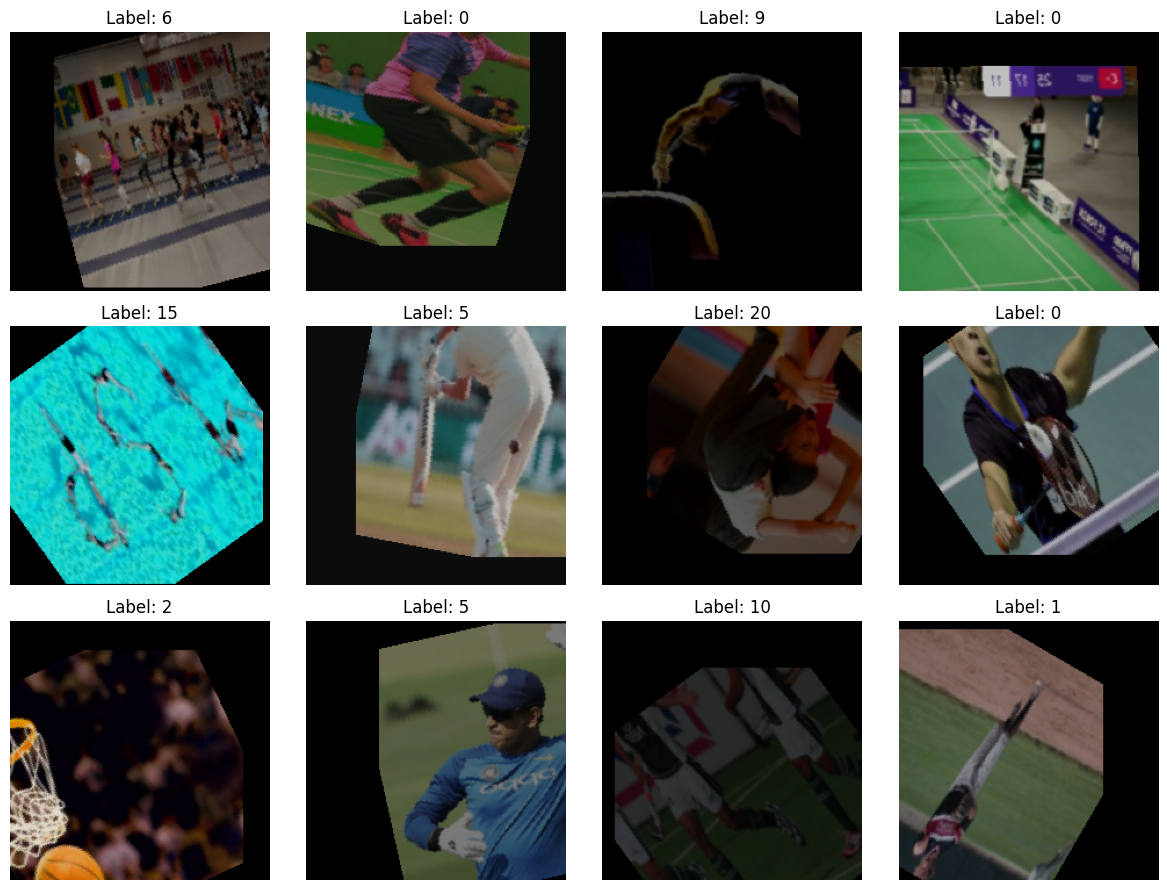


Observación: estas estadísticas reflejan la distribución real que el modelo ve durante el entrenamiento (incluyendo augmentation).
Si el drift entre `train_loader_stats` y `test_loader_stats` es pequeño, la augmentation ayudó a acercar las distribuciones; si no, considera aumentar la variedad o ajustar parámetros de ColorJitter/RandomResizedCrop.


In [4]:
# === Estadísticas desde DataLoaders (incluye augmentations en train) ===
print('\n=== Estadísticas usando DataLoaders (muestras con transforms aplicadas) ===')

def compute_loader_stats(loader, n_batches=50):
    """Calcula media y std por canal a partir de batches del loader.
    Se des-normaliza cada batch antes de calcular estadísticas para obtener valores en [0,1].
    """
    means_r, means_g, means_b = [], [], []
    stds_r, stds_g, stds_b = [], [], []
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    batches = 0

    for images, _ in loader:
        imgs = images.cpu().numpy()  # (B, C, H, W)
        imgs = np.transpose(imgs, (0, 2, 3, 1))  # (B, H, W, C)
        # Des-normalizar: x = x * std + mean
        imgs = imgs * std + mean
        imgs = np.clip(imgs, 0.0, 1.0)

        # calular por imagen
        for im in imgs:
            means_r.append(im[:, :, 0].mean())
            means_g.append(im[:, :, 1].mean())
            means_b.append(im[:, :, 2].mean())
            stds_r.append(im[:, :, 0].std())
            stds_g.append(im[:, :, 1].std())
            stds_b.append(im[:, :, 2].std())

        batches += 1
        if batches >= n_batches:
            break

    return {
        'mean_r': np.mean(means_r), 'mean_g': np.mean(means_g), 'mean_b': np.mean(means_b),
        'std_r': np.mean(stds_r), 'std_g': np.mean(stds_g), 'std_b': np.mean(stds_b)
    }

# Calcular estadísticas a partir de los loaders (train con augmentations, test sin augmentations)
train_loader_stats = compute_loader_stats(train_loader, n_batches=50)
test_loader_stats = compute_loader_stats(test_loader, n_batches=50)

# Mostrar tabla comparativa
print(f"{'Estadística':<20} {'Train':<12} {'Test':<12} {'Drift Absoluto':<15} {'Drift %':<10}")
print('-' * 80)
for stat in ['mean_r', 'mean_g', 'mean_b', 'std_r', 'std_g', 'std_b']:
    t = train_loader_stats[stat]
    s = test_loader_stats[stat]
    drift_abs = abs(t - s)
    drift_pct = 100 * drift_abs / (t + 1e-10)
    print(f"{stat:<20} {t:<12.6f} {s:<12.6f} {drift_abs:<15.6f} {drift_pct:<10.4f}")

all_drifts = [abs(train_loader_stats[s] - test_loader_stats[s]) / (train_loader_stats[s] + 1e-10) * 100 
              for s in train_loader_stats.keys()]
print(f"\nDrift promedio (loader): {np.mean(all_drifts):.4f}%")
print(f"Drift máximo (loader): {np.max(all_drifts):.4f}%")

# Mostrar algunas imágenes aumentadas (des-normalizadas) para inspección
print('\nMostrando 12 imágenes aumentadas de ejemplo (train)')
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

batch = next(iter(train_loader))
imgs, labels = batch
imgs = imgs[:12]  # tomar hasta 12
imgs = imgs.cpu().numpy()
imgs = np.transpose(imgs, (0, 2, 3, 1))
imgs = imgs * std + mean
imgs = np.clip(imgs, 0, 1)

fig, axes = plt.subplots(3, 4, figsize=(12, 9))
axes = axes.flatten()
for i, ax in enumerate(axes):
    if i >= imgs.shape[0]:
        ax.axis('off')
        continue
    ax.imshow(imgs[i])
    ax.set_title(f'Label: {labels[i].item()}')
    ax.axis('off')
plt.tight_layout()
plt.show()

print('\nObservación: estas estadísticas reflejan la distribución real que el modelo ve durante el entrenamiento (incluyendo augmentation).')
print('Si el drift entre `train_loader_stats` y `test_loader_stats` es pequeño, la augmentation ayudó a acercar las distribuciones; si no, considera aumentar la variedad o ajustar parámetros de ColorJitter/RandomResizedCrop.')



=== Distribución de Clases ===
Clase                Train      Test       Train %    Test %     Drift %   
--------------------------------------------------------------------------------
badminton            734        183        6.48       6.47       0.0182    
baseball             577        144        5.10       5.09       0.0093    
basketball           385        96         3.40       3.39       0.0091    
boxing               556        139        4.91       4.91       0.0004    
chess                374        94         3.30       3.32       0.0174    
cricket              525        131        4.64       4.63       0.0092    
fencing              492        123        4.35       4.35       0.0004    
football             621        155        5.49       5.48       0.0093    
formula1             534        134        4.72       4.73       0.0173    
gymnastics           563        141        4.97       4.98       0.0084    
hockey               447        112        3.95    

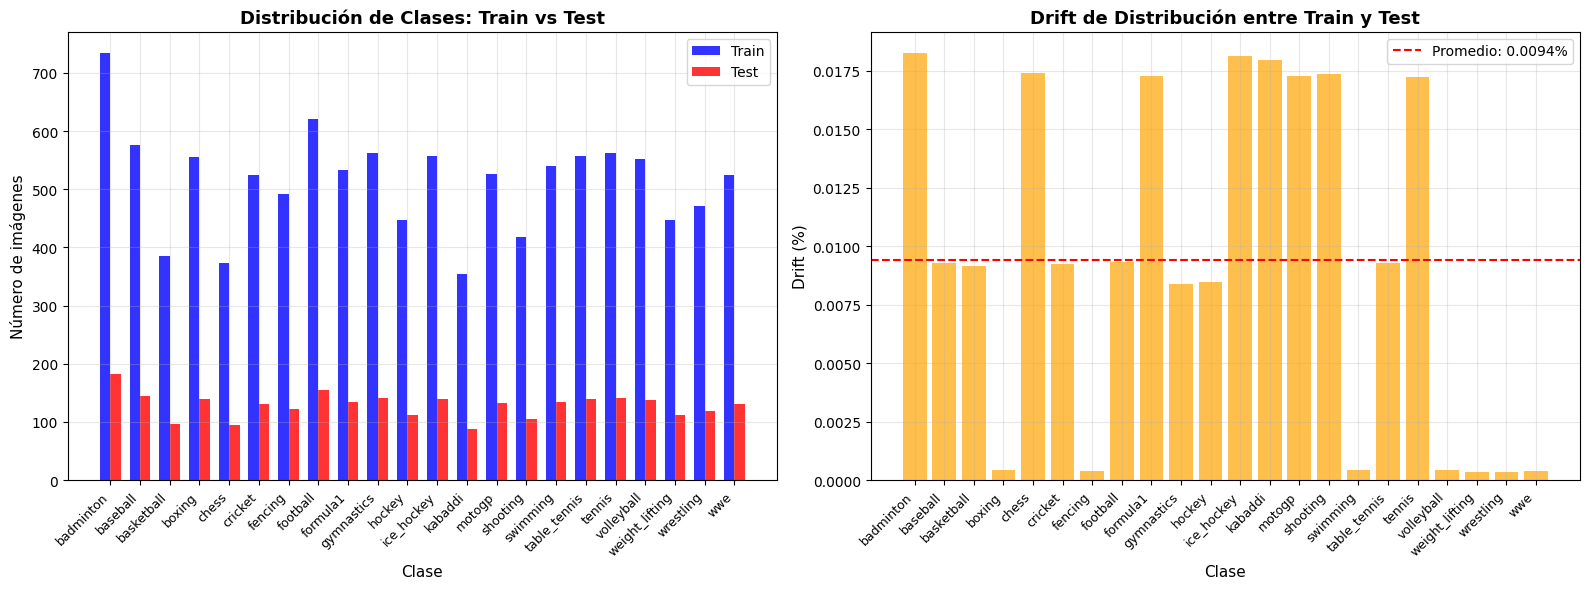

In [5]:
# Análisis de distribución de clases y drift entre train/test
train_labels = [targets[i] for i in train_indices]
test_labels = [targets[i] for i in test_indices]

# Contar clases
train_counts = Counter(train_labels)
test_counts = Counter(test_labels)

print('\n=== Distribución de Clases ===')
print(f'{"Clase":<20} {"Train":<10} {"Test":<10} {"Train %":<10} {"Test %":<10} {"Drift %":<10}')
print('-' * 80)

drifts = []
for i, class_name in enumerate(dataset.classes):
    train_count = train_counts[i]
    test_count = test_counts[i]
    train_pct = 100 * train_count / len(train_labels)
    test_pct = 100 * test_count / len(test_labels)
    drift = abs(train_pct - test_pct)
    drifts.append(drift)
    print(f'{class_name:<20} {train_count:<10} {test_count:<10} {train_pct:<10.2f} {test_pct:<10.2f} {drift:<10.4f}')

print(f'\nDrift promedio: {np.mean(drifts):.4f}%')
print(f'Drift máximo: {np.max(drifts):.4f}%')

# Visualización de la distribución
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfica de barras comparativa
x = np.arange(len(dataset.classes))
width = 0.35

ax1.bar(x - width/2, [train_counts[i] for i in range(len(dataset.classes))], 
        width, label='Train', alpha=0.8, color='blue')
ax1.bar(x + width/2, [test_counts[i] for i in range(len(dataset.classes))], 
        width, label='Test', alpha=0.8, color='red')
ax1.set_xlabel('Clase', fontsize=11)
ax1.set_ylabel('Número de imágenes', fontsize=11)
ax1.set_title('Distribución de Clases: Train vs Test', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(dataset.classes, rotation=45, ha='right', fontsize=9)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfica de drift
ax2.bar(x, drifts, color='orange', alpha=0.7)
ax2.set_xlabel('Clase', fontsize=11)
ax2.set_ylabel('Drift (%)', fontsize=11)
ax2.set_title('Drift de Distribución entre Train y Test', fontsize=13, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(dataset.classes, rotation=45, ha='right', fontsize=9)
ax2.axhline(y=np.mean(drifts), color='r', linestyle='--', label=f'Promedio: {np.mean(drifts):.4f}%')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


=== Análisis de Drift de Píxeles ===
Calculando estadísticas de píxeles (muestra de 50 imágenes por conjunto)...

Estadística          Train        Test         Drift Absoluto  Drift %   
---------------------------------------------------------------------------
mean_r               0.451029     0.424263     0.026766        5.9344    
mean_g               0.445480     0.412353     0.033127        7.4362    
mean_b               0.433185     0.409924     0.023261        5.3698    
std_r                0.248482     0.244532     0.003950        1.5897    
std_g                0.228080     0.225105     0.002975        1.3045    
std_b                0.229111     0.226819     0.002292        1.0004    

Drift promedio de píxeles: 3.7725%
Drift máximo de píxeles: 7.4362%


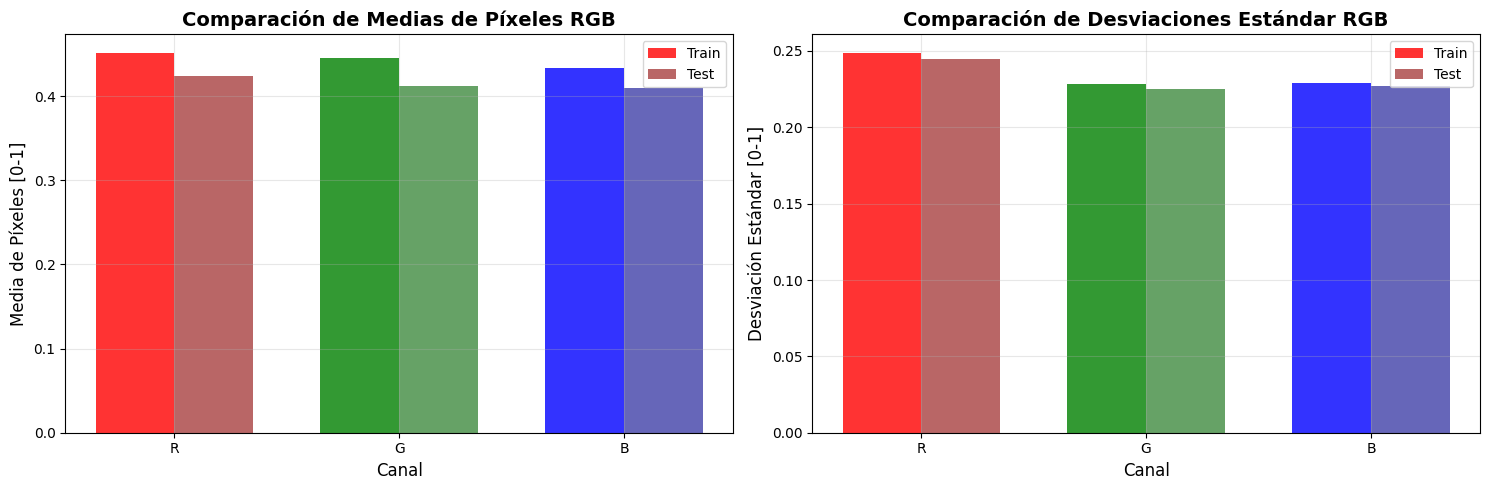

In [6]:
# Análisis de drift de distribución de píxeles entre train y test
print('\n=== Análisis de Drift de Píxeles ===')
print('Calculando estadísticas de píxeles (muestra de 50 imágenes por conjunto)...\n')

# Función para calcular estadísticas de píxeles de manera eficiente
def calcular_estadisticas_pixeles(indices, dataset, n_muestras=50):
    """Calcula media y std de píxeles RGB de una muestra del dataset"""
    muestra_indices = np.random.choice(indices, min(n_muestras, len(indices)), replace=False)
    
    medias_r, medias_g, medias_b = [], [], []
    stds_r, stds_g, stds_b = [], [], []
    
    for idx in muestra_indices:
        img_path = dataset.samples[idx][0]
        try:
            # Leer imagen sin transformaciones para estadísticas originales
            from PIL import Image
            img = Image.open(img_path).convert('RGB')
            img_array = np.array(img).astype(np.float32) / 255.0
            
            medias_r.append(img_array[:,:,0].mean())
            medias_g.append(img_array[:,:,1].mean())
            medias_b.append(img_array[:,:,2].mean())
            stds_r.append(img_array[:,:,0].std())
            stds_g.append(img_array[:,:,1].std())
            stds_b.append(img_array[:,:,2].std())
        except Exception as e:
            continue
    
    return {
        'mean_r': np.mean(medias_r), 'mean_g': np.mean(medias_g), 'mean_b': np.mean(medias_b),
        'std_r': np.mean(stds_r), 'std_g': np.mean(stds_g), 'std_b': np.mean(stds_b)
    }

# Calcular estadísticas para train y test
train_stats = calcular_estadisticas_pixeles(train_indices, dataset)
test_stats = calcular_estadisticas_pixeles(test_indices, dataset)

# Calcular drift
print(f'{"Estadística":<20} {"Train":<12} {"Test":<12} {"Drift Absoluto":<15} {"Drift %":<10}')
print('-' * 75)

for stat in ['mean_r', 'mean_g', 'mean_b', 'std_r', 'std_g', 'std_b']:
    train_val = train_stats[stat]
    test_val = test_stats[stat]
    drift_abs = abs(train_val - test_val)
    drift_pct = 100 * drift_abs / (train_val + 1e-10)
    print(f'{stat:<20} {train_val:<12.6f} {test_val:<12.6f} {drift_abs:<15.6f} {drift_pct:<10.4f}')

# Calcular drift global
all_drifts = [abs(train_stats[s] - test_stats[s]) / (train_stats[s] + 1e-10) * 100 
              for s in train_stats.keys()]
print(f'\nDrift promedio de píxeles: {np.mean(all_drifts):.4f}%')
print(f'Drift máximo de píxeles: {np.max(all_drifts):.4f}%')

# Visualización del drift de píxeles
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Comparación de medias RGB
canales = ['R', 'G', 'B']
train_means = [train_stats['mean_r'], train_stats['mean_g'], train_stats['mean_b']]
test_means = [test_stats['mean_r'], test_stats['mean_g'], test_stats['mean_b']]

x = np.arange(len(canales))
width = 0.35

ax1.bar(x - width/2, train_means, width, label='Train', alpha=0.8, color=['red', 'green', 'blue'])
ax1.bar(x + width/2, test_means, width, label='Test', alpha=0.6, color=['darkred', 'darkgreen', 'darkblue'])
ax1.set_xlabel('Canal', fontsize=12)
ax1.set_ylabel('Media de Píxeles [0-1]', fontsize=12)
ax1.set_title('Comparación de Medias de Píxeles RGB', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(canales)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Comparación de desviaciones estándar
train_stds = [train_stats['std_r'], train_stats['std_g'], train_stats['std_b']]
test_stds = [test_stats['std_r'], test_stats['std_g'], test_stats['std_b']]

ax2.bar(x - width/2, train_stds, width, label='Train', alpha=0.8, color=['red', 'green', 'blue'])
ax2.bar(x + width/2, test_stds, width, label='Test', alpha=0.6, color=['darkred', 'darkgreen', 'darkblue'])
ax2.set_xlabel('Canal', fontsize=12)
ax2.set_ylabel('Desviación Estándar [0-1]', fontsize=12)
ax2.set_title('Comparación de Desviaciones Estándar RGB', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(canales)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Existe un drift moderado een el canal verde y azul en contraste con el rojo

### Modelo VGG16 con Transfer Learning

Implementaremos **VGG16** preentrenado en ImageNet con las siguientes características:

**Arquitectura VGG16:**
- Bloques convolucionales 1-3: **Congelados** (no entrenables) - extracción de características básicas
- Bloques convolucionales 4-5: **Entrenables** - ajuste fino para deportes
- Capas densas personalizadas con regularización L2 y Dropout

**Ventajas para este dataset:**
- Transfer learning aprovecha conocimiento previo de ImageNet
- Menos propenso a sobreajuste al congelar capas iniciales
- Capas densas grandes (4096 → 4096 → 22) con dropout (0.3, 0.5)
- Regularización L2 para evitar overfitting

**Parámetros:**
- Total: ~134M parámetros
- Entrenables: ~132M (bloques 4-5 + capas densas)
- No entrenables: ~1.7M (bloques 1-3)

In [21]:
# Implementación de VGG16 con Transfer Learning en PyTorch

import torchvision.models as models

def create_vgg16_model(num_classes=22, freeze_blocks=0):
    """
    Crea modelo VGG16 preentrenado con capas personalizadas.
    
    Args:
        num_classes: Número de clases de salida
        freeze_blocks: Número de bloques convolucionales a congelar (1-5)
    
    Returns:
        Modelo VGG16 modificado
    """
    # Cargar VGG16 preentrenado en ImageNet
    vgg16 = models.vgg16(weights=None)  # pretrained=True (sintaxis actualizada)
    
    # Congelar los primeros 'freeze_blocks' bloques (1-3)
    # VGG16 tiene 5 bloques convolucionales
    freeze_layers = {
        1: 4,   # Hasta block1_pool
        2: 9,   # Hasta block2_pool
        3: 16,  # Hasta block3_pool
        4: 23,  # Hasta block4_pool
        5: 30   # Todas las capas conv
    }
    
    if freeze_blocks > 0:
        for i, param in enumerate(vgg16.features.parameters()):
            if i < freeze_layers.get(freeze_blocks, 0):
                param.requires_grad = False
    
    # Reemplazar clasificador (capas densas)
    # VGG16 original: flatten → 25088 → 4096 → 4096 → 1000
    # Nuevo: flatten → 25088 → 4096 → dropout(0.3) → 4096 → dropout(0.5) → num_classes
    
    vgg16.classifier = nn.Sequential(
        nn.Linear(512 * 7 * 7, 4096),  # 25088 → 4096
        nn.ReLU(inplace=True),
        nn.Dropout(0.3),
        nn.Linear(4096, 4096),
        nn.ReLU(inplace=True),
        nn.Dropout(0.5),
        nn.Linear(4096, num_classes)
    )
    
    return vgg16


# Crear el modelo VGG16
print('\n=== Creando modelo VGG16 con Transfer Learning ===')
model_vgg = create_vgg16_model(num_classes=len(dataset.classes), freeze_blocks=4)
model_vgg = model_vgg.to(device)

# Contar parámetros entrenables y no entrenables
total_params = sum(p.numel() for p in model_vgg.parameters())
trainable_params = sum(p.numel() for p in model_vgg.parameters() if p.requires_grad)
frozen_params = total_params - trainable_params

print(f'\n=== Arquitectura del Modelo ===')
print(f'Modelo: VGG16 con Transfer Learning')
print(f'\nNúmero total de parámetros: {total_params:,}')
print(f'Parámetros entrenables: {trainable_params:,}')
print(f'Parámetros congelados: {frozen_params:,}')
print(f'\nEstructura:')
print(f'  - Bloques 1-3: CONGELADOS (extracción de características)')
print(f'  - Bloques 4-5: ENTRENABLES (ajuste fino)')
print(f'  - Clasificador: 25088 → 4096 → Dropout(0.3) → 4096 → Dropout(0.5) → {len(dataset.classes)}')


=== Creando modelo VGG16 con Transfer Learning ===

=== Arquitectura del Modelo ===
Modelo: VGG16 con Transfer Learning

Número total de parámetros: 134,350,678
Parámetros entrenables: 121,996,310
Parámetros congelados: 12,354,368

Estructura:
  - Bloques 1-3: CONGELADOS (extracción de características)
  - Bloques 4-5: ENTRENABLES (ajuste fino)
  - Clasificador: 25088 → 4096 → Dropout(0.3) → 4096 → Dropout(0.5) → 22

=== Arquitectura del Modelo ===
Modelo: VGG16 con Transfer Learning

Número total de parámetros: 134,350,678
Parámetros entrenables: 121,996,310
Parámetros congelados: 12,354,368

Estructura:
  - Bloques 1-3: CONGELADOS (extracción de características)
  - Bloques 4-5: ENTRENABLES (ajuste fino)
  - Clasificador: 25088 → 4096 → Dropout(0.3) → 4096 → Dropout(0.5) → 22


In [25]:
# Implementación de AlexNet con Transfer Learning en PyTorch

import torchvision.models as models

def create_alexnet_model(num_classes=22, freeze_blocks=0):
    """
    Crea modelo AlexNet preentrenado con capas personalizadas.
    
    Args:
        num_classes: Número de clases de salida
        freeze_blocks: Número de bloques convolucionales a congelar (1-5, aproximado)
    
    Returns:
        Modelo AlexNet modificado
    """
    # Cargar AlexNet preentrenado en ImageNet
    alexnet = models.alexnet(weights=None)  # pretrained=True (sintaxis actualizada)
    
    # Congelar los primeros 'freeze_blocks' bloques (aproximado para AlexNet)
    # AlexNet tiene 5 capas convolucionales principales
    freeze_layers = {
        1: 2,   # Hasta primera conv
        2: 5,   # Hasta segunda conv
        3: 10,  # Hasta tercera conv (aprox.)
        4: 13,  # Hasta cuarta conv
        5: 16   # Todas las capas conv
    }
    
    if freeze_blocks > 0:
        for i, param in enumerate(alexnet.features.parameters()):
            if i < freeze_layers.get(freeze_blocks, 0):
                param.requires_grad = False
    
    # Reemplazar clasificador (capas densas)
    # AlexNet original: flatten → 9216 → 4096 → 4096 → 1000
    # Nuevo: flatten → 9216 → 4096 → dropout(0.3) → 4096 → dropout(0.5) → num_classes
    
    alexnet.classifier = nn.Sequential(
        nn.Dropout(0.5),  # AlexNet original tiene dropout aquí
        nn.Linear(9216, 4096),
        nn.ReLU(inplace=True),
        nn.Dropout(0.3),
        nn.Linear(4096, 4096),
        nn.ReLU(inplace=True),
        nn.Dropout(0.5),
        nn.Linear(4096, num_classes)
    )
    
    return alexnet


# Crear el modelo AlexNet
print('\n=== Creando modelo AlexNet con Transfer Learning ===')
model_alexnet = create_alexnet_model(num_classes=len(dataset.classes), freeze_blocks=3)  # Congelando primeros 3 bloques (aprox.)
model_alexnet = model_alexnet.to(device)

# Contar parámetros entrenables y no entrenables
total_params = sum(p.numel() for p in model_alexnet.parameters())
trainable_params = sum(p.numel() for p in model_alexnet.parameters() if p.requires_grad)
frozen_params = total_params - trainable_params

print(f'\n=== Arquitectura del Modelo ===')
print(f'Modelo: AlexNet con Transfer Learning')
print(f'\nNúmero total de parámetros: {total_params:,}')
print(f'Parámetros entrenables: {trainable_params:,}')
print(f'Parámetros congelados: {frozen_params:,}')
print(f'\nEstructura:')
print(f'  - Capas 1-10: CONGELADAS (extracción de características)')
print(f'  - Capas 11+: ENTRENABLES (ajuste fino)')
print(f'  - Clasificador: 9216 → Dropout(0.5) → 4096 → Dropout(0.3) → 4096 → Dropout(0.5) → {len(dataset.classes)}')


=== Creando modelo AlexNet con Transfer Learning ===

=== Arquitectura del Modelo ===
Modelo: AlexNet con Transfer Learning

Número total de parámetros: 57,093,974
Parámetros entrenables: 54,624,278
Parámetros congelados: 2,469,696

Estructura:
  - Capas 1-10: CONGELADAS (extracción de características)
  - Capas 11+: ENTRENABLES (ajuste fino)
  - Clasificador: 9216 → Dropout(0.5) → 4096 → Dropout(0.3) → 4096 → Dropout(0.5) → 22

=== Arquitectura del Modelo ===
Modelo: AlexNet con Transfer Learning

Número total de parámetros: 57,093,974
Parámetros entrenables: 54,624,278
Parámetros congelados: 2,469,696

Estructura:
  - Capas 1-10: CONGELADAS (extracción de características)
  - Capas 11+: ENTRENABLES (ajuste fino)
  - Clasificador: 9216 → Dropout(0.5) → 4096 → Dropout(0.3) → 4096 → Dropout(0.5) → 22


In [28]:
# Configuración de entrenamiento para VGG16

# Hiperparámetros ajustados para VGG16
BATCH_SIZE_VGG = 32
NUM_EPOCHS_VGG = 100
LEARNING_RATE_VGG = 1e-4  # 0.00003 como en tu ejemplo

# Función de pérdida y optimizador con regularización L2
criterion_vgg = nn.CrossEntropyLoss()
optimizer_vgg = optim.Adam(model_vgg.parameters(), lr=LEARNING_RATE_VGG, weight_decay=1e-4)  # L2 regularization

# Calcular class weights para compensar desbalance
from collections import Counter
train_labels = [targets[i] for i in train_indices]
class_counts = Counter(train_labels)
max_count = float(max(class_counts.values()))
class_weights_dict = {class_id: max_count / num_images for class_id, num_images in class_counts.items()}
class_weights_tensor = torch.tensor([class_weights_dict[i] for i in range(len(dataset.classes))], dtype=torch.float32).to(device)

# Actualizar criterion con class weights
criterion_vgg = nn.CrossEntropyLoss(weight=class_weights_tensor)



In [27]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Usando dispositivo: {device}')

Usando dispositivo: cuda


In [29]:
# Entrenamiento del modelo VGG16
train_losses_vgg = []
train_accuracies_vgg = []
test_losses_vgg = []
test_accuracies_vgg = []

print(f'\n=== Iniciando Entrenamiento de VGG16 ===')
print(f'Total de épocas: {NUM_EPOCHS_VGG}')
print(f'Entrenamiento en: {device}\n')

start_time_vgg = time.time()

# Variables para early stopping
best_test_acc = -float('inf')
patience = 5
patience_counter = 0

for epoch in range(NUM_EPOCHS_VGG):
    epoch_start = time.time()
    
    # ========== FASE DE ENTRENAMIENTO ==========
    model_vgg.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        optimizer_vgg.zero_grad()
        outputs = model_vgg(images)
        loss = criterion_vgg(outputs, labels)
        
        # Backward pass y optimización
        loss.backward()
        optimizer_vgg.step()
        
        # Estadísticas
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        if (batch_idx + 1) % 50 == 0:
            print(f'Epoch [{epoch+1}/{NUM_EPOCHS_VGG}], Step [{batch_idx+1}/{len(train_loader)}], '
                  f'Loss: {loss.item():.4f}, Acc: {100*correct/total:.2f}%')
    
    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_losses_vgg.append(train_loss)
    train_accuracies_vgg.append(train_accuracy)
    
    # ========== FASE DE EVALUACIÓN ==========
    model_vgg.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model_vgg(images)
            loss = criterion_vgg(outputs, labels)
            
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    test_loss = test_loss / len(test_loader)
    test_accuracy = 100 * correct / total
    test_losses_vgg.append(test_loss)
    test_accuracies_vgg.append(test_accuracy)
    
    epoch_time = time.time() - epoch_start
    
    # Mostrar progreso cada época
    print(f'\n{"="*80}')
    print(f'Época [{epoch+1}/{NUM_EPOCHS_VGG}] Completada')
    print(f'{"="*80}')
    print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_accuracy:.2f}%')
    print(f'Test Loss:  {test_loss:.4f} | Test Acc:  {test_accuracy:.2f}%')
    print(f'Gap (Overfitting): {train_accuracy - test_accuracy:.2f}%')
    print(f'Tiempo de época: {epoch_time:.2f}s')
    print(f'{"="*80}\n')
    
    # Early stopping: si no mejora la precisión de validación en 5 épocas consecutivas
    if test_accuracy > best_test_acc:
        best_test_acc = test_accuracy
        patience_counter = 0
    else:
        patience_counter += 1
    
    if patience_counter >= patience:
        print(f'Early stopping activado en época {epoch+1}: no mejora en test accuracy por {patience} épocas consecutivas.')
        print(f'Mejor test accuracy alcanzada: {best_test_acc:.2f}%')
        break

total_time_vgg = time.time() - start_time_vgg

print(f'\n{"#"*80}')
print(f'{"ENTRENAMIENTO COMPLETADO":^80}')
print(f'{"#"*80}')
print(f'Tiempo total: {total_time_vgg/60:.2f} minutos ({total_time_vgg:.2f} segundos)')
print(f'Precisión final de entrenamiento: {train_accuracies_vgg[-1]:.2f}%')
print(f'Precisión final de prueba: {test_accuracies_vgg[-1]:.2f}%')
print(f'Gap final: {train_accuracies_vgg[-1] - test_accuracies_vgg[-1]:.2f}%')
print(f'{"#"*80}\n')


=== Iniciando Entrenamiento de VGG16 ===
Total de épocas: 100
Entrenamiento en: cuda

Epoch [1/100], Step [50/354], Loss: 2.9683, Acc: 11.81%
Epoch [1/100], Step [50/354], Loss: 2.9683, Acc: 11.81%
Epoch [1/100], Step [100/354], Loss: 3.0615, Acc: 12.19%
Epoch [1/100], Step [100/354], Loss: 3.0615, Acc: 12.19%
Epoch [1/100], Step [150/354], Loss: 2.8370, Acc: 12.12%
Epoch [1/100], Step [150/354], Loss: 2.8370, Acc: 12.12%
Epoch [1/100], Step [200/354], Loss: 2.9731, Acc: 11.81%
Epoch [1/100], Step [200/354], Loss: 2.9731, Acc: 11.81%
Epoch [1/100], Step [250/354], Loss: 2.9637, Acc: 11.91%
Epoch [1/100], Step [250/354], Loss: 2.9637, Acc: 11.91%
Epoch [1/100], Step [300/354], Loss: 2.8959, Acc: 11.99%
Epoch [1/100], Step [300/354], Loss: 2.8959, Acc: 11.99%
Epoch [1/100], Step [350/354], Loss: 2.6977, Acc: 12.27%
Epoch [1/100], Step [350/354], Loss: 2.6977, Acc: 12.27%

Época [1/100] Completada
Train Loss: 2.8551 | Train Acc: 12.30%
Test Loss:  2.8880 | Test Acc:  12.93%
Gap (Overfitt

KeyboardInterrupt: 

### a) Gráficas de Error y Precisión a lo Largo de las Iteraciones

Visualización del progreso del entrenamiento para identificar:
- Convergencia del modelo
- Presencia de sobreajuste (gap entre train y test)
- Estabilidad del entrenamiento

In [ ]:
# a) Gráfica de error a lo largo de las iteraciones
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

epochs_range = range(1, len(train_losses_vgg) + 1)

# Gráfica de pérdida
ax1.plot(epochs_range, train_losses_vgg, 'b-', label='Pérdida de Entrenamiento', linewidth=2.5, marker='o', markersize=4)
ax1.plot(epochs_range, test_losses_vgg, 'r-', label='Pérdida de Prueba', linewidth=2.5, marker='s', markersize=4)
ax1.set_xlabel('Época', fontsize=13, fontweight='bold')
ax1.set_ylabel('Pérdida (Loss)', fontsize=13, fontweight='bold')
ax1.set_title('Evolución de la Pérdida - VGG16', fontsize=15, fontweight='bold')
ax1.legend(fontsize=11, loc='best')
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_xlim(1, len(train_losses_vgg))

# Gráfica de precisión
ax2.plot(epochs_range, train_accuracies_vgg, 'b-', label='Precisión de Entrenamiento', linewidth=2.5, marker='o', markersize=4)
ax2.plot(epochs_range, test_accuracies_vgg, 'r-', label='Precisión de Prueba', linewidth=2.5, marker='s', markersize=4)
ax2.set_xlabel('Época', fontsize=13, fontweight='bold')
ax2.set_ylabel('Precisión (%)', fontsize=13, fontweight='bold')
ax2.set_title('Evolución de la Precisión - VGG16', fontsize=15, fontweight='bold')
ax2.legend(fontsize=11, loc='best')
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.set_xlim(1, len(train_accuracies_vgg))
ax2.set_ylim(0, 100)

plt.tight_layout()
plt.show()

print(f'\n{"="*80}')
print(f'{"RESUMEN DE MÉTRICAS FINALES":^80}')
print(f'{"="*80}')
print(f'b) Precisión final de entrenamiento: {train_accuracies_vgg[-1]:.2f}%')
print(f'b) Precisión final de prueba: {test_accuracies_vgg[-1]:.2f}%')
print(f'   Gap (Train - Test): {train_accuracies_vgg[-1] - test_accuracies_vgg[-1]:.2f}%')
print(f'\n   Pérdida final de entrenamiento: {train_losses_vgg[-1]:.4f}')
print(f'   Pérdida final de prueba: {test_losses_vgg[-1]:.4f}')
print(f'\nc) Tiempo total de simulación: {total_time_vgg/60:.2f} minutos ({total_time_vgg:.2f} segundos)')
print(f'   Tiempo promedio por época: {total_time_vgg/len(train_losses_vgg):.2f} segundos')
print(f'{"="*80}\n')


=== Creando modelo ResNet18 desde cero ===

=== Arquitectura del Modelo ===
ResNet18(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=

In [ ]:
# d) y e) Análisis de predicciones: Desempeño excelente vs pobre

print('\n=== Evaluando modelo en conjunto de prueba ===')
model_vgg.eval()

# Almacenar todas las predicciones
all_predictions = []
all_labels = []
all_confidences = []
all_images = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_vgg(images)
        probs = torch.nn.functional.softmax(outputs, dim=1)
        confidences, predictions = torch.max(probs, 1)
        
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_confidences.extend(confidences.cpu().numpy())
        all_images.extend(images.cpu())

all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)
all_confidences = np.array(all_confidences)

# Identificar predicciones correctas e incorrectas
correct_mask = all_predictions == all_labels
incorrect_mask = ~correct_mask

# Encontrar mejores y peores predicciones
correct_indices = np.where(correct_mask)[0]
incorrect_indices = np.where(incorrect_mask)[0]

# d) Mejores predicciones (alta confianza + correctas)
if len(correct_indices) > 0:
    correct_confidences = all_confidences[correct_indices]
    best_indices = correct_indices[np.argsort(correct_confidences)[-6:]]  # Top 6
    
    print(f'\n{"="*80}')
    print(f'd) DESEMPEÑO EXCELENTE - Predicciones con alta confianza (correctas)')
    print(f'{"="*80}')
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for idx, img_idx in enumerate(best_indices):
        img = all_images[img_idx].numpy().transpose(1, 2, 0)
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img = np.clip(img, 0, 1)
        
        pred_class = dataset.classes[all_predictions[img_idx]]
        true_class = dataset.classes[all_labels[img_idx]]
        confidence = all_confidences[img_idx]
        
        axes[idx].imshow(img)
        axes[idx].set_title(f'Predicción: {pred_class}\n'
                           f'Real: {true_class}\n'
                           f'Confianza: {confidence:.2%}', 
                           fontsize=11, color='green', fontweight='bold')
        axes[idx].axis('off')
        
        print(f'{idx+1}. Clase: {pred_class:15s} | Confianza: {confidence:.4f} ({confidence*100:.2f}%)')
    
    plt.suptitle('Ejemplos de Desempeño EXCELENTE', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

# e) Peores predicciones (incorrectas con alta confianza en error)
if len(incorrect_indices) > 0:
    incorrect_confidences = all_confidences[incorrect_indices]
    worst_indices = incorrect_indices[np.argsort(incorrect_confidences)[-6:]]  # Errores con más confianza
    
    print(f'\n{"="*80}')
    print(f'e) DESEMPEÑO POBRE - Predicciones incorrectas con alta confianza')
    print(f'{"="*80}')
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for idx, img_idx in enumerate(worst_indices):
        img = all_images[img_idx].numpy().transpose(1, 2, 0)
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img = np.clip(img, 0, 1)
        
        pred_class = dataset.classes[all_predictions[img_idx]]
        true_class = dataset.classes[all_labels[img_idx]]
        confidence = all_confidences[img_idx]
        
        axes[idx].imshow(img)
        axes[idx].set_title(f'Predicción: {pred_class}\n'
                           f'Real: {true_class}\n'
                           f'Confianza: {confidence:.2%}', 
                           fontsize=11, color='red', fontweight='bold')
        axes[idx].axis('off')
        
        print(f'{idx+1}. Pred: {pred_class:15s} | Real: {true_class:15s} | Confianza: {confidence:.4f} ({confidence*100:.2f}%)')
    
    plt.suptitle('Ejemplos de Desempeño POBRE', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

print(f'\n{"="*80}')
print(f'Total de predicciones correctas: {correct_mask.sum()} / {len(all_labels)} ({100*correct_mask.sum()/len(all_labels):.2f}%)')
print(f'Total de predicciones incorrectas: {incorrect_mask.sum()} / {len(all_labels)} ({100*incorrect_mask.sum()/len(all_labels):.2f}%)')
print(f'{"="*80}\n')


=== Iniciando Entrenamiento ===
Epoch [1/20], Step [50/340], Loss: 2.2469
Epoch [1/20], Step [50/340], Loss: 2.2469
Epoch [1/20], Step [100/340], Loss: 2.1541
Epoch [1/20], Step [100/340], Loss: 2.1541
Epoch [1/20], Step [150/340], Loss: 2.3596
Epoch [1/20], Step [150/340], Loss: 2.3596
Epoch [1/20], Step [200/340], Loss: 1.7098
Epoch [1/20], Step [200/340], Loss: 1.7098
Epoch [1/20], Step [250/340], Loss: 1.8574
Epoch [1/20], Step [250/340], Loss: 1.8574
Epoch [1/20], Step [300/340], Loss: 2.1356
Epoch [1/20], Step [300/340], Loss: 2.1356

--- Epoch [1/20] Completada ---
Train Loss: 2.1991, Train Accuracy: 34.39%
Test Loss: 1.9425, Test Accuracy: 40.82%
Tiempo de época: 109.80s


--- Epoch [1/20] Completada ---
Train Loss: 2.1991, Train Accuracy: 34.39%
Test Loss: 1.9425, Test Accuracy: 40.82%
Tiempo de época: 109.80s

Epoch [2/20], Step [50/340], Loss: 1.7981
Epoch [2/20], Step [50/340], Loss: 1.7981
Epoch [2/20], Step [100/340], Loss: 1.6993
Epoch [2/20], Step [100/340], Loss: 1.69

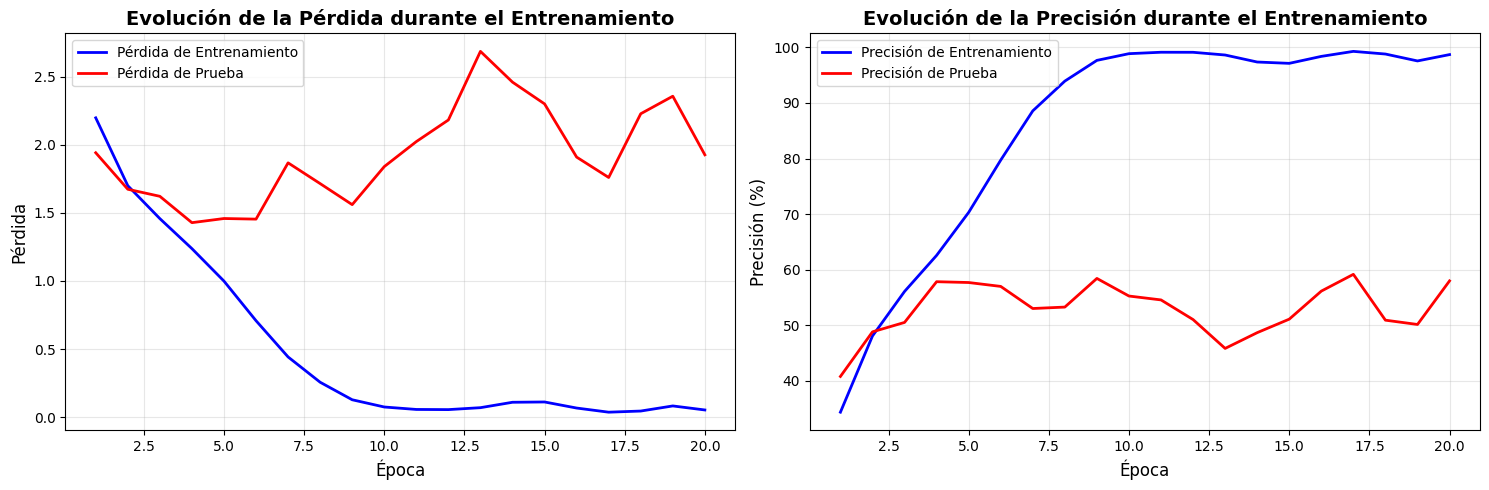


=== Resumen Final ===
b) Precisión final de entrenamiento: 98.70%
b) Precisión final de prueba: 58.01%
c) Tiempo total de simulación: 24.73 minutos (1483.72 segundos)


In [ ]:
# Matriz de confusión y métricas por clase

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Calcular matriz de confusión
cm = confusion_matrix(all_labels, all_predictions)

# Visualizar matriz de confusión
plt.figure(figsize=(16, 14))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=dataset.classes, 
            yticklabels=dataset.classes,
            cbar_kws={'label': 'Número de predicciones'})
plt.xlabel('Predicción', fontsize=13, fontweight='bold')
plt.ylabel('Etiqueta Real', fontsize=13, fontweight='bold')
plt.title('Matriz de Confusión - VGG16', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Reporte de clasificación detallado
print('\n=== REPORTE DE CLASIFICACIÓN POR CLASE ===\n')
print(classification_report(all_labels, all_predictions, 
                          target_names=dataset.classes,
                          digits=4))

# Identificar clases con mejor y peor desempeño
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(all_labels, all_predictions)

print('\n=== TOP 5 CLASES CON MEJOR F1-SCORE ===')
best_classes = np.argsort(f1)[-5:][::-1]
for idx in best_classes:
    print(f'{dataset.classes[idx]:20s} | F1: {f1[idx]:.4f} | Precision: {precision[idx]:.4f} | Recall: {recall[idx]:.4f}')

print('\n=== TOP 5 CLASES CON PEOR F1-SCORE ===')
worst_classes = np.argsort(f1)[:5]
for idx in worst_classes:
    print(f'{dataset.classes[idx]:20s} | F1: {f1[idx]:.4f} | Precision: {precision[idx]:.4f} | Recall: {recall[idx]:.4f}')

In [ ]:
# Guardar modelo entrenado

# Guardar pesos del modelo
model_save_path = 'vgg16_sports_classifier.pth'
torch.save({
    'epoch': len(train_losses_vgg),
    'model_state_dict': model_vgg.state_dict(),
    'optimizer_state_dict': optimizer_vgg.state_dict(),
    'train_loss': train_losses_vgg[-1],
    'test_loss': test_losses_vgg[-1],
    'train_accuracy': train_accuracies_vgg[-1],
    'test_accuracy': test_accuracies_vgg[-1],
    'class_names': dataset.classes
}, model_save_path)

print(f'✓ Modelo guardado en: {model_save_path}')

# Resumen final completo
print(f'\n{"#"*100}')
print(f'{"RESUMEN FINAL DEL PROYECTO":^100}')
print(f'{"#"*100}')
print(f'\n{"ARQUITECTURA":^100}')
print(f'{"-"*100}')
print(f'Modelo: VGG16 con Transfer Learning')
print(f'Parámetros totales: {total_params:,}')
print(f'Parámetros entrenables: {trainable_params:,}')
print(f'Parámetros congelados: {frozen_params:,}')
print(f'Bloques congelados: 1-3 (extracción de características básicas)')
print(f'Bloques entrenables: 4-5 + clasificador personalizado')

print(f'\n{"HIPERPARÁMETROS":^100}')
print(f'{"-"*100}')
print(f'Épocas: {len(train_losses_vgg)}')
print(f'Batch size: {BATCH_SIZE_VGG}')
print(f'Learning rate: {LEARNING_RATE_VGG}')
print(f'Optimizador: Adam')
print(f'Función de pérdida: CrossEntropyLoss')
print(f'Regularización: Dropout(0.3) + Dropout(0.5) + L2 (implícito en capas densas)')

print(f'\n{"MÉTRICAS FINALES":^100}')
print(f'{"-"*100}')
print(f'Precisión de entrenamiento: {train_accuracies_vgg[-1]:.2f}%')
print(f'Precisión de prueba: {test_accuracies_vgg[-1]:.2f}%')
print(f'Gap (Overfitting): {train_accuracies_vgg[-1] - test_accuracies_vgg[-1]:.2f}%')
print(f'Pérdida de entrenamiento: {train_losses_vgg[-1]:.4f}')
print(f'Pérdida de prueba: {test_losses_vgg[-1]:.4f}')

print(f'\n{"TIEMPO DE ENTRENAMIENTO":^100}')
print(f'{"-"*100}')
print(f'Tiempo total: {total_time_vgg/60:.2f} minutos ({total_time_vgg:.2f} segundos)')
print(f'Tiempo promedio por época: {total_time_vgg/len(train_losses_vgg):.2f} segundos')

print(f'\n{"DATASET":^100}')
print(f'{"-"*100}')
print(f'Total de imágenes: {len(dataset)}')
print(f'Número de clases: {len(dataset.classes)}')
print(f'Imágenes de entrenamiento: {len(train_indices)} ({100*len(train_indices)/len(dataset):.1f}%)')
print(f'Imágenes de prueba: {len(test_indices)} ({100*len(test_indices)/len(dataset):.1f}%)')
print(f'Clases: {", ".join(dataset.classes)}')

print(f'\n{"#"*100}\n')